In [3]:
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt



In [20]:


# Load lexicon data from InSet
positive_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv'
negative_url = 'https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv'

# Load positive and negative words from URLs
positive_words = requests.get(positive_url).text.splitlines()
negative_words = requests.get(negative_url).text.splitlines()

# Create lexicon from InSet data
lexicon = {
    'positif': [word.split('\t')[0] for word in positive_words if '\t' in word],
    'negatif': [word.split('\t')[0] for word in negative_words if '\t' in word]
}

# Display InSet data in DataFrame
inset_df = pd.DataFrame({
    'Positive Words': positive_words[:10],
    'Negative Words': negative_words[:10]
})
print("InSet Lexicon Head:\n", inset_df.head())



InSet Lexicon Head:
   Positive Words            Negative Words
0   word\tweight              word\tweight
1         hai\t3    putus tali gantung\t-2
2     merekam\t2               gelebah\t-2
3   ekstensif\t3            gobar hati\t-2
4   paripurna\t1  tersentuh (perasaan)\t-1


In [21]:

# Display head of InSet DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="InSet Lexicon Head", dataframe=inset_df)

# Load Google Playstore review data from CSV file
csv_file_path = 'BankDigital/dataset/Sample400Dataset.csv'  # Update with the actual path to your CSV file
reviews_df = pd.read_csv(csv_file_path)

# Extract cleaned_content column for sentiment analysis
reviews = reviews_df['cleaned_content'].dropna().tolist()


In [22]:
reviews

['parahh tarik tunai bank mega uang ga notif apk tulisan nya berhasil muncul uang tunai nya bank mega ga masuk akal tolong proses secepatnya kecewa berat',
 'kecewa banget aplikasi terdeteksi wajah pin oke wajah ktp saldo tolongg solusinya',
 'daftar kagak masuk masuk sinyal aja udah pakai wifi aja ga klo ga pake ga nunjukin aplikasi',
 'awas hati aplikasi aplikasi ngambil data aja klu login hrus pkai ktp dn verifikasi wajah kaya orng minjem duit tp giliran udah fto ktp verifikasi wjah gak limit tlong hapus data sya klau sampe d salah sya gak akn segan laporin k ojk',
 'pelanggan allo prime kecew belanja weekend diskon gaada minimal transaksi banget belanja transmart rb transaksi kasir gaada promo minimal belanja rb tau gitu udah pake cash aja gaada promo benee benee kecewa bangett goodnye allo prime haeusnya promo allonya dipasang minimal belanja rb biar konsumen tertipu',
 'gmna scan ktp kalo burem apknya mah foto bagus pas scan ga aneh',
 'masuk aplikasi langsung ya allo untung dana

In [54]:
# Load colloquial lexicon for normalization
colloquial_url = 'https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv'
colloquial_df = pd.read_csv(colloquial_url)
colloquial_dict = dict(zip(colloquial_df['slang'], colloquial_df['formal']))

# Function to normalize slang words using colloquial dictionary
def normalize_text(text, colloquial_dict):
    words = text.split()
    normalized_words = [colloquial_dict.get(word, word) for word in words]
    return ' '.join(normalized_words), words, normalized_words
# Normalize reviews
total_reviews = len(reviews)
normalized_reviews = [normalize_text(review, colloquial_dict) for review in reviews]

In [55]:
# Normalize reviews and collect normalization statistics
total_reviews = len(reviews)
normalized_reviews = []
normalization_counter = Counter()

In [57]:
for review in reviews:
    normalized_text, original_words, normalized_words = normalize_text(review, colloquial_dict)
    normalized_reviews.append(normalized_text)
    for word, normalized_word in zip(original_words, normalized_words):
        if word != normalized_word:
            normalization_counter[word] += 1

In [58]:
total_reviews

18

In [60]:
normalized_reviews

['parah tarik tunai bank mega uang enggak notif apk tulisan nya berhasil muncul uang tunai nya bank mega enggak masuk akal tolong proses secepatnya kecewa berat',
 'kecewa banget aplikasi terdeteksi wajah pin oke wajah ktp saldo tolongg solusinya',
 'daftar kagak masuk masuk sinyal saja sudah pakai wifi saja enggak kalo enggak pakai enggak nunjukin aplikasi',
 'awas hati aplikasi aplikasi ngambil data saja kalau login harus pakai ktp dan verifikasi wajah kayak orang minjem duit tapi giliran sudah foto ktp verifikasi wjah enggak limit tlong hapus data saya kalau sampai di salah saya enggak akan segan laporin ke ojk',
 'pelanggan allo prime kecew belanja weekend diskon enggak ada minimal transaksi banget belanja transmart ribu transaksi kasir enggak ada promo minimal belanja ribu tau begitu sudah pakai cash saja enggak ada promo benee benee kecewa banget goodnye allo prime haeusnya promo allonya dipasang minimal belanja ribu biar konsumen tertipu',
 'bagaimana scan ktp kalo buram apknya 

In [61]:
# Display top 10 most normalized words
most_common_normalized = normalization_counter.most_common(10)
print("Kata yang paling sering dinormalisasi:\n", most_common_normalized)

Kata yang paling sering dinormalisasi:
 [('aja', 7), ('sya', 7), ('ga', 6), ('udah', 4), ('gak', 4), ('k', 3), ('gaada', 3), ('rb', 3), ('pake', 2), ('nggak', 2)]


In [63]:
# Display most common words in DataFrame
most_common_normalized_df = pd.DataFrame(most_common_normalized, columns=['Kata', 'Frekuensi'])
print("Kata Terbanyak dalam Cleaned Content (DataFrame):", most_common_normalized_df)

Kata Terbanyak dalam Cleaned Content (DataFrame):     Kata  Frekuensi
0    aja          7
1    sya          7
2     ga          6
3   udah          4
4    gak          4
5      k          3
6  gaada          3
7     rb          3
8   pake          2
9  nggak          2


In [11]:
# Sentiment Analysis Function
def sentiment_analysis(data, lexicon):
    results = []
    for sentence in data:
        # Preprocess the sentence
        sentence_clean = re.sub(r'[^a-zA-Z\s]', '', sentence.lower())
        words = sentence_clean.split()
        
        # Initialize counters
        positive_count = 0
        negative_count = 0
        
        # Count sentiment words
        for word in words:
            if word in lexicon['positif']:
                positive_count += 1
            elif word in lexicon['negatif']:
                negative_count += 1
        
        # Determine sentiment
        if positive_count > negative_count:
            sentiment = 'Positif'
        elif negative_count > positive_count:
            sentiment = 'Negatif'
        else:
            sentiment = 'Netral'
        
        # Append result
        results.append({'Kalimat': sentence, 'Sentimen': sentiment, 'Positif': positive_count, 'Negatif': negative_count})
    
    return pd.DataFrame(results)

In [12]:
print(reviews)

['parahh tarik tunai bank mega uang ga notif apk tulisan nya berhasil muncul uang tunai nya bank mega ga masuk akal tolong proses secepatnya kecewa berat', 'kecewa banget aplikasi terdeteksi wajah pin oke wajah ktp saldo tolongg solusinya', 'daftar kagak masuk masuk sinyal aja udah pakai wifi aja ga klo ga pake ga nunjukin aplikasi', 'awas hati aplikasi aplikasi ngambil data aja klu login hrus pkai ktp dn verifikasi wajah kaya orng minjem duit tp giliran udah fto ktp verifikasi wjah gak limit tlong hapus data sya klau sampe d salah sya gak akn segan laporin k ojk', 'pelanggan allo prime kecew belanja weekend diskon gaada minimal transaksi banget belanja transmart rb transaksi kasir gaada promo minimal belanja rb tau gitu udah pake cash aja gaada promo benee benee kecewa bangett goodnye allo prime haeusnya promo allonya dipasang minimal belanja rb biar konsumen tertipu', 'gmna scan ktp kalo burem apknya mah foto bagus pas scan ga aneh', 'masuk aplikasi langsung ya allo untung dana kelua

In [30]:
# Run sentiment analysis on normalized reviews
results_df = sentiment_analysis(normalized_reviews, lexicon)

# Display results
print("Google Playstore Reviews Sentiment Analysis:\n", results_df.head())

# Calculate and display word statistics
results_df['Total Words'] = results_df['Kalimat'].apply(lambda x: len(x.split()))
# word_statistics = results_df[['Sentimen', 'Positif', 'Negatif', 'Total Words']].groupby('Sentimen').sum()
# word_statistics = results_df[['Sentimen', 'Positif', 'Negatif']].groupby('Sentimen').sum()

# print("Statistik Kata Berdasarkan Sentimen:\n", word_statistics)

Google Playstore Reviews Sentiment Analysis:
                                              Kalimat Sentimen
0  parah tarik tunai bank mega uang enggak notif ...  Positif
1  kecewa banget aplikasi terdeteksi wajah pin ok...  Positif
2  daftar kagak masuk masuk sinyal saja sudah pak...  Negatif
3  awas hati aplikasi aplikasi ngambil data saja ...  Negatif
4  pelanggan allo prime kecew belanja weekend dis...  Positif


In [31]:
print(results_df)

                                              Kalimat Sentimen  Total Words
0   parah tarik tunai bank mega uang enggak notif ...  Positif           26
1   kecewa banget aplikasi terdeteksi wajah pin ok...  Positif           12
2   daftar kagak masuk masuk sinyal saja sudah pak...  Negatif           17
3   awas hati aplikasi aplikasi ngambil data saja ...  Negatif           43
4   pelanggan allo prime kecew belanja weekend dis...  Positif           49
5   bagaimana scan ktp kalo buram apknya mah foto ...  Positif           13
6   masuk aplikasi langsung ya allo untung dana ke...  Positif            9
7   apk aneh giliran berhasil data berubah merubah...  Positif           26
8   distabilkan aplikasinya bayar pakir transmart ...  Positif           14
9   maksudnya ya saya daftar sesuai aturan tiba-ti...  Positif           27
10  allo bank terhormat tolong hapus data data mas...  Negatif           20
11  mendaftar eh ngajukan paylater tolak awas saja...  Negatif           17
12  kecewa b

In [34]:
# Calculate and display word statistics for cleaned_content based on lexicon
word_stats_cleaned_content = {
    'Positif': 0,
    'Negatif': 0
}

for review in normalized_reviews:
    words = re.sub(r'[^a-zA-Z\s]', '', review.lower()).split()
    for word in words:
        if word in lexicon['positif']:
            word_stats_cleaned_content['Positif'] += 1
        elif word in lexicon['negatif']:
            word_stats_cleaned_content['Negatif'] += 1

print("Statistik Kata pada cleaned_content Berdasarkan Lexicon:\n", word_stats_cleaned_content)

Statistik Kata pada cleaned_content Berdasarkan Lexicon:
 {'Positif': 87, 'Negatif': 73}


In [62]:
from collections import Counter
# Count the frequency of words in the cleaned_content column
all_words = ' '.join(normalized_reviews).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(10)

# Display most common words
print("Kata Terbanyak dalam Cleaned Content:\n", most_common_words)

Kata Terbanyak dalam Cleaned Content:
 [('enggak', 15), ('aplikasi', 10), ('data', 9), ('saja', 7), ('saya', 7), ('bank', 6), ('masuk', 6), ('allo', 6), ('promo', 6), ('nya', 5)]


In [44]:
# Word frequency analysis for cleaned_content in colloquial lexicon
colloquial_words = [word for word in all_words if word in colloquial_dict]
word_counts_col = Counter(colloquial_words)
most_common_words = word_counts_col.most_common(10)

# Display most common colloquial words
print("Kata Colloquial yang Paling Sering Muncul:\n", most_common_words)

Kata Colloquial yang Paling Sering Muncul:
 []


In [39]:
# Display most common words in DataFrame
most_common_words_df = pd.DataFrame(most_common_words, columns=['Kata', 'Frekuensi'])
print("Kata Terbanyak dalam Cleaned Content (DataFrame):", most_common_words_df)


Kata Terbanyak dalam Cleaned Content (DataFrame):        Kata  Frekuensi
0    enggak         15
1  aplikasi         10
2      data          9
3      saja          7
4      saya          7
5      bank          6
6     masuk          6
7      allo          6
8     promo          6
9       nya          5


In [40]:
most_common_words_df

,Kata,Frekuensi
0,enggak,15
1,aplikasi,10
2,data,9
3,saja,7
4,saya,7
5,bank,6
6,masuk,6
7,allo,6
8,promo,6
9,nya,5


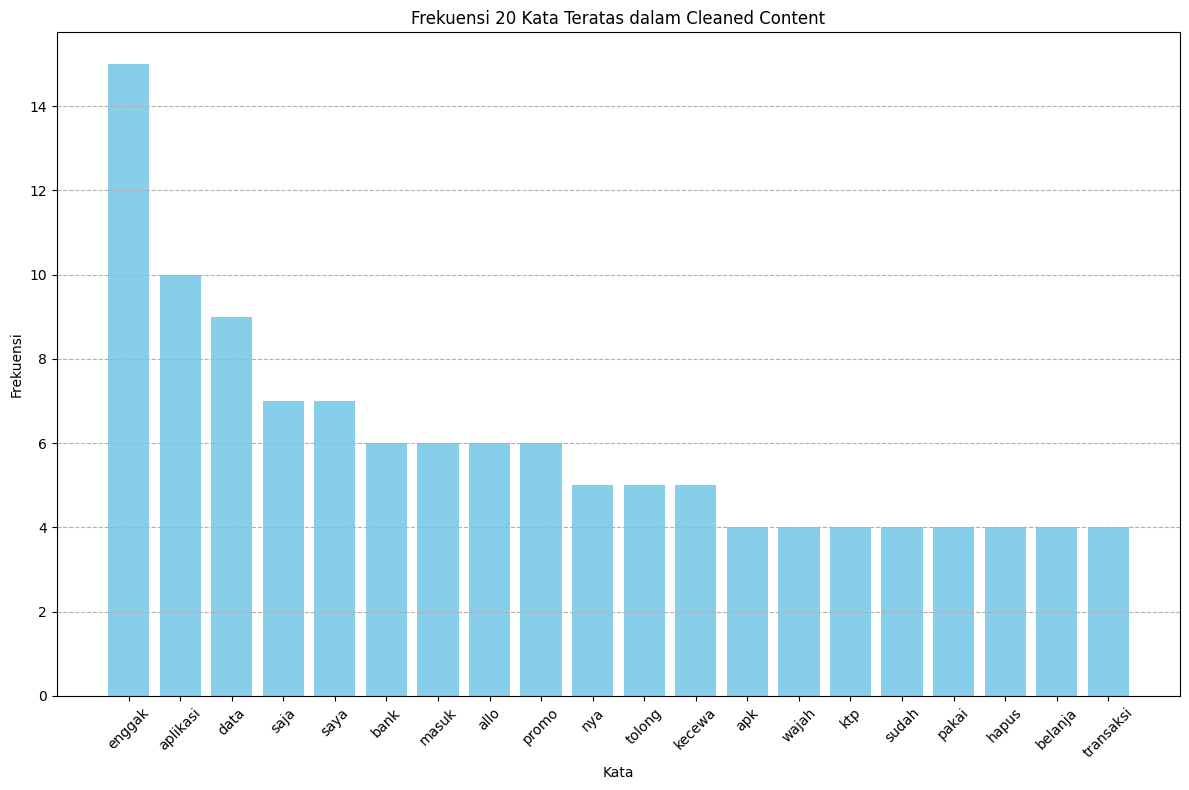

In [37]:

# Visualize word frequency (Bar Chart for Top 20 Words)
word_freq_df = pd.DataFrame(word_counts.most_common(20), columns=['Kata', 'Frekuensi'])
plt.figure(figsize=(12, 8))
plt.bar(word_freq_df['Kata'], word_freq_df['Frekuensi'], color='skyblue')
plt.title('Frekuensi 20 Kata Teratas dalam Cleaned Content')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('word_frequency_bar_chart.png')
plt.show()

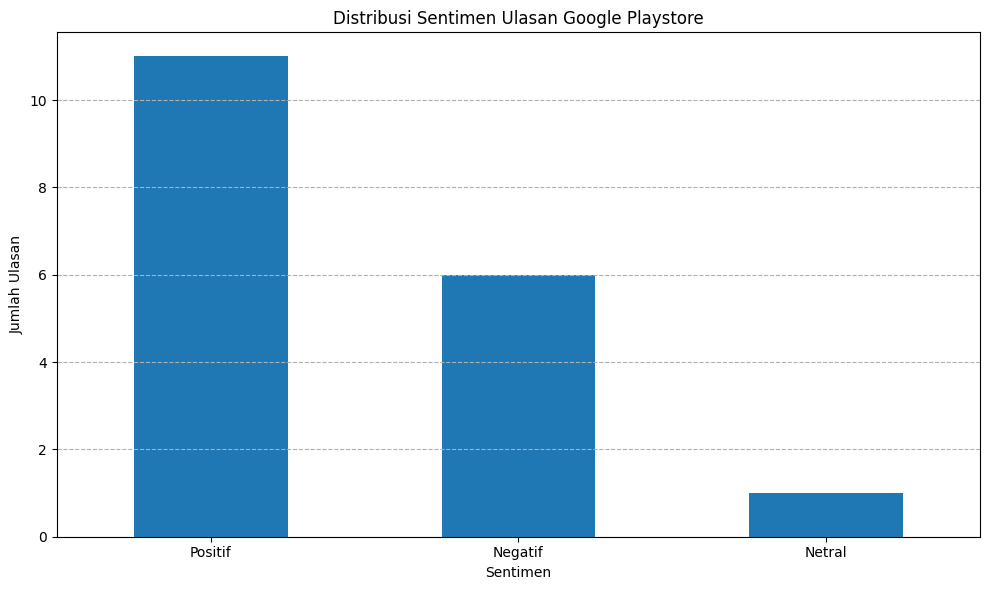

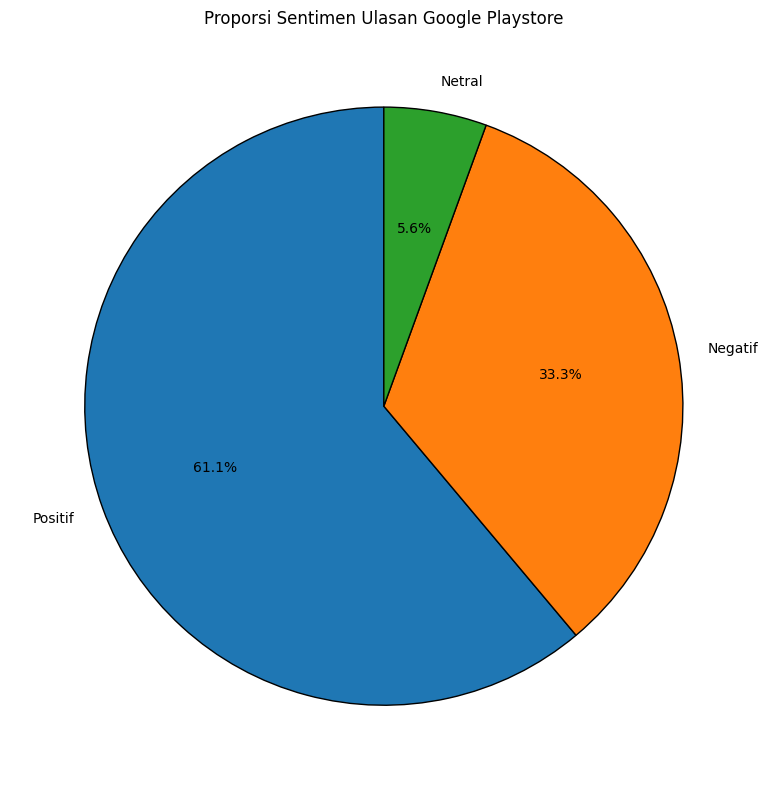

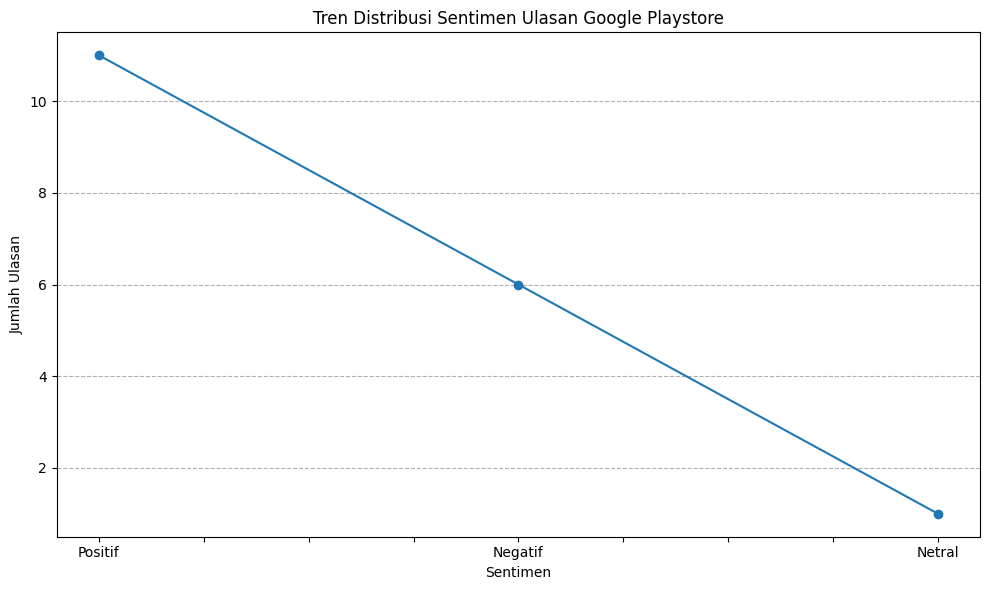

In [32]:
# Visualize sentiment results (Bar Chart)
sentiment_counts = results_df['Sentimen'].value_counts()
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar')
plt.title('Distribusi Sentimen Ulasan Google Playstore')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_distribution_bar_chart.png')
plt.show()

# Visualize sentiment results (Pie Chart)
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proporsi Sentimen Ulasan Google Playstore')
plt.ylabel('')
plt.tight_layout()
plt.savefig('sentiment_distribution_pie_chart.png')
plt.show()

# Visualize sentiment results (Line Chart)
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='line', marker='o')
plt.title('Tren Distribusi Sentimen Ulasan Google Playstore')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('sentiment_distribution_line_chart.png')
plt.show()